In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}

df = pd.read_csv('cleaned_nypd_arrest_date.csv', dtype=data_types)

In [14]:
df.head()

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2024-01-10,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Manhattan,26,0,<18,Male,BLACK,40.814845,-73.956312
1,2024-01-02,RAPE 1,104.0,RAPE,PL 1303501,Felony,Brooklyn,77,0,25-44,Male,WHITE HISPANIC,40.674496,-73.930571
2,2024-01-03,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Queens,106,0,65+,Female,WHITE,40.662526,-73.846499
3,2024-01-19,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Bronx,49,0,45-64,Male,BLACK,40.855793,-73.843908
4,2024-01-11,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,Felony,Brooklyn,81,2,25-44,Female,BLACK,40.694456,-73.934343


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63210 entries, 0 to 63209
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ARREST_DATE        63210 non-null  object  
 1   PD_DESC            63210 non-null  category
 2   KY_CD              63210 non-null  float64 
 3   OFNS_DESC          63210 non-null  category
 4   LAW_CODE           63210 non-null  category
 5   LAW_CAT_CD         63210 non-null  category
 6   ARREST_BORO        63210 non-null  category
 7   ARREST_PRECINCT    63210 non-null  category
 8   JURISDICTION_CODE  63210 non-null  category
 9   AGE_GROUP          63210 non-null  category
 10  PERP_SEX           63210 non-null  category
 11  PERP_RACE          63210 non-null  category
 12  Latitude           63210 non-null  float64 
 13  Longitude          63210 non-null  float64 
dtypes: category(10), float64(3), object(1)
memory usage: 2.7+ MB


In [16]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [17]:
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month
unique_months = df['ARREST_MONTH'].unique()
unique_months.sort()
print("Unique months listed in the ARREST_DATE column:")
print(unique_months)


Unique months listed in the ARREST_DATE column:
[1 2 3]


In [18]:
df['LAW_CAT_CD'].unique()

['Felony', 'Misdemeanor', 'Violation', 'Unclassified Violation', 'Traffic']
Categories (5, object): ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']

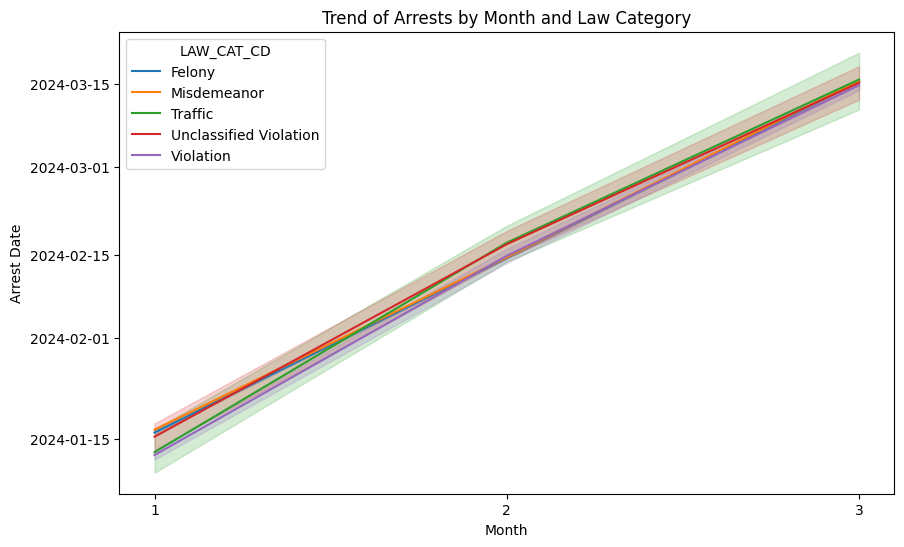

In [19]:
months = [1, 2, 3]
filtered_df = df[df['ARREST_MONTH'].isin(months)]

# Define the order of categories for the legend
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='ARREST_MONTH', y='ARREST_DATE', hue='LAW_CAT_CD', hue_order=law_cat_order)
plt.title('Trend of Arrests by Month and Law Category')
plt.xlabel('Month')
plt.ylabel('Arrest Date')
plt.xticks(months)  # Set x-axis ticks to match the selected months
plt.show()